<center>
    <img src="http://lh-memor.inf.utfsm.cl/wp-content/uploads/2016/01/logo-blog.png"></img>
    <h4>INF391 - Reconocimiento de Patrones en Minería de Datos</h4>
    <h1>Tarea 1</h1>
    <h2>Beer Clustering</h2>
</center>
<br>
<br>

<center>*Autores: * Nicolás Aravena; David Frankenberg</center>
<center>*email: * <nicolas.aravena@alumnos.usm.cl>; <david.frankenberg@alumnos.usm.cl></center>
<center>*rol: *201173561-7; 201173554-4</center>

## Introducción 

Una de las actividades más recurrentes en la historia de la humanidad ha sido clasificar objetos en categorías. Ya sean personas, ciudades, objetos o acontecimientos todos son muchos para poder ser procesados por un grupo pequeño o muy grande de personas.

Por lo anterior, sucede que desde el comienzo de su existencia, la computación ha estado ligada con el proceso de clasificación de objetos. Al comienzo se ayudó en el almacenamiento y organización de los datos de una manera mas óptima y clara para aquellos que los necesitaban. Con el pasar de los años, junto con el aumento en las capacidades de procesamiento y de memoria, el proceso de organización de objeto tomó un rol más activo en la clasificación de los mismos con la realización de programas para clasificar. Esto da paso a los algoritmos de agrupamiento o clustering.

Según Wikipedia, los **algoritmos de agrupamiento** o de *clustering* se definen como un "procedimiento de agrupación de una serie de vectores de acuerdo con un criterio. Esos criterios son por lo general distancia o similitud. La cercanía se define en términos de una determinada función de distancia, como la euclídea, aunque existen otras más robustas o que permiten extenderla a variables discretas. La medida más utilizada para medir la similitud entre los casos es la matriz de correlación entre los nxn casos. Sin embargo, también existen muchos algoritmos que se basan en la máximización de una propiedad estadística llamada verosimilitud."

A continuación se presenta un análisis de un  *dataset* que contiene una muestra de un gran repositorio de reseñas de cerveza, con distintos parámetros de clasificación, en donde se procederá a ocupar distintos métodos de agrupamiento o *clustering* para poder encontrar patrones que tengan sentido con el *dataset* mismo.



## Desarrollo

Los algoritmos que se expondrán durante este informe, trabajan sobre una muestra aleatoria del dataset *beeradvocate* el cual consiste en una gran colección de reseñas de cervezas de del sitio *BeerAdvocate*.

Para el mejor funcionamiento de los algoritmos a presentar a continuación, se utilizará una muestra del archivo provisto en la definición de la tarea, donde se seleccionaron las 10 compañias con más reseñas dentro de las 5 variedades más populares del *dataset*, para de esta forma encontrar datos que sean más consistentes con un analisis de clustering que el *dataset* completo.

A continuación encontrara una descripción semi automatizada del dataset. 

In [1]:
import pandas as pd

dataset = pd.read_csv('beer_reviews/sample.csv')
size, features = dataset.shape

print("\nEl dataset completo consta de {} registros y {} caracteristicas.".format(size, features))


El dataset completo consta de 99845 registros y 14 caracteristicas.


Utilizando el método `info()` del objeto `DataFrame` de la librería `pandas` se procede a describir cuantitativamente las columnas (características)  del dataset, asciendo énfasis en el nombre de las mismas y en su tipo.

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 14 columns):
Unnamed: 0            99845 non-null int64
brewery_id            99845 non-null int64
brewery_name          99845 non-null object
review_time           99845 non-null int64
review_overall        99845 non-null float64
review_aroma          99845 non-null float64
review_appearance     99845 non-null float64
review_profilename    99813 non-null object
beer_style            99845 non-null object
review_palate         99845 non-null float64
review_taste          99845 non-null float64
beer_name             99845 non-null object
beer_abv              99755 non-null float64
beer_beerid           99845 non-null int64
dtypes: float64(6), int64(4), object(4)
memory usage: 10.7+ MB


De la información obtenida en el recuadro anterior, se procede a eliminar aquellas características que no otorgan información relevante para los procedimientos de clustering, tales como identificadores varios, además de tipos de datos que no son directamente tratables como textos.

In [3]:
dataset.drop('brewery_id', 1, inplace=True)
dataset.drop('brewery_name', 1, inplace=True)
dataset.drop('review_time', 1, inplace=True)
dataset.drop('review_profilename', 1, inplace=True)
dataset.drop('beer_style', 1, inplace=True)
dataset.drop('beer_name', 1, inplace=True)
dataset.drop('beer_beerid', 1, inplace=True)

Como fue mencionado anteriormente, y debido a los problemas de memoria que se presentan al trabajar con el dataset completo se trabajara con una muestra aleatoria. Para asegurar que los resultados obtenidos en este informe sean replicables se utilizara una semilla explicita para generar los valores aleatorios. El tamaño de la muestra y la semilla utilizada se presentan a continuación.

In [15]:
percentage = 100
seed = 10

datasetSample = dataset.sample(n = int(size*percentage/100), random_state = seed)
size, features = datasetSample.shape

print("El tamanno de la muestra es de {} registros lo que representa un {}% del total.".format(size, percentage))
print("Ademas luego de las eliminaciones consta de solo {} caracteristicas".format(features))

El tamanno de la muestra es de 2995 registros lo que representa un 100% del total.
Ademas luego de las eliminaciones consta de solo 7 caracteristicas


Ahora para eliminar datos faltantes, se ejecuta el siguiente método.

In [16]:
datasetSample = datasetSample.fillna(0)

Con las características seleccionadas y los datos corregidos, podemos determinar cierta información estadística relevante de las mismas, para esto utilizamos el método `describe()` provisto por `pandas`. 

In [17]:
print(datasetSample.describe())

         Unnamed: 0  review_overall  review_aroma  review_appearance  \
count  2.995000e+03     2995.000000   2995.000000        2995.000000   
mean   7.245645e+05        4.092988      4.113022           4.146411   
std    5.506639e+05        0.611718      0.546438           0.470240   
min    1.616300e+04        1.000000      1.000000           2.000000   
25%    9.773900e+04        4.000000      4.000000           4.000000   
50%    8.811100e+05        4.000000      4.000000           4.000000   
75%    1.189736e+06        4.500000      4.500000           4.500000   
max    1.557106e+06        5.000000      5.000000           5.000000   

       review_palate  review_taste     beer_abv  
count    2995.000000   2995.000000  2995.000000  
mean        4.096995      4.186811     8.691853  
std         0.521121      0.582456     2.549521  
min         1.000000      1.000000     0.000000  
25%         4.000000      4.000000     6.900000  
50%         4.000000      4.000000     8.500000  
7

Finalmente, y para trabajar con los datos, se utilizará el dataset representado en forma de matriz. 

In [18]:
beers = datasetSample.as_matrix()

A continuación, a modo de ejemplo se presenta un fragmento de la matriz resultante.

In [19]:
print(beers)

[[  1.36771900e+06   4.00000000e+00   4.00000000e+00 ...,   3.00000000e+00
    3.50000000e+00   9.90000000e+00]
 [  8.76101000e+05   4.50000000e+00   4.50000000e+00 ...,   4.00000000e+00
    4.50000000e+00   7.70000000e+00]
 [  1.54453900e+06   3.00000000e+00   3.50000000e+00 ...,   3.00000000e+00
    3.00000000e+00   6.70000000e+00]
 ..., 
 [  1.33419300e+06   5.00000000e+00   4.50000000e+00 ...,   5.00000000e+00
    4.50000000e+00   9.50000000e+00]
 [  1.36774200e+06   3.50000000e+00   4.00000000e+00 ...,   3.00000000e+00
    3.50000000e+00   9.90000000e+00]
 [  9.02730000e+04   4.00000000e+00   3.50000000e+00 ...,   4.00000000e+00
    3.50000000e+00   5.60000000e+00]]


In [22]:
################################################
#   PCA para la seleccion de caracteristicas   #
################################################

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

beers_std = StandardScaler().fit_transform(beers)

sklearn_pca = PCA(n_components=2)
beers_redu = sklearn_pca.fit_transform(beers_std)
print(beers_redu)

[[ 2.61963473  0.65607366]
 [-0.2636203  -0.48352329]
 [ 4.31571807  0.14118519]
 ..., 
 [-2.29272714  0.71451149]
 [ 2.62253674  0.96440193]
 [ 1.36485653 -1.60882231]]


In [61]:
# El otro metodo utilizdo por el profe en sus scripts

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, manifold

X = manifold.SpectralEmbedding(n_components=2).fit_transform(beers)
X_red = StandardScaler().fit_transform(X)

print(X_red)

/usr/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


[[ 1.67084787  1.334307  ]
 [-1.33728798  1.43344684]
 [ 1.16842746  0.77742849]
 ..., 
 [ 1.10906978  0.71163694]
 [ 1.67084787  1.334307  ]
 [-0.56708379 -1.05386773]]


# K-Means

In [55]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_means = KMeans(init = "random", n_clusters = 10)
k_means.fit(beers_redu)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

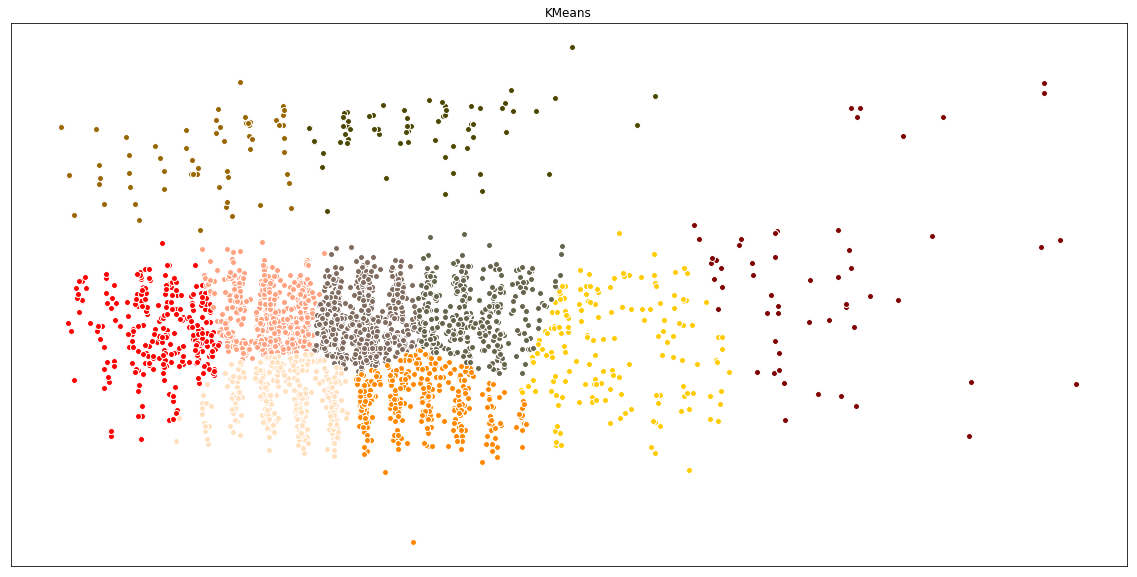

In [56]:
fig = plt.figure(figsize=(20,10))
colors = "#ff0000, #7f0000, #ffa280, #806c60, #ff8800, #ffe1bf, #996600, #ffcc00, #4c4700, #66644d, #eeff00, #fbffbf, #66ff00, #7db359, #8fbfa3, #005930, #00ffaa, #00eeff, #003c40, #00aaff, #738c99, #004480, #0066ff, #0000ff, #0000bf, #000066, #c8bfff, #9559b3, #cc00ff, #590047, #ff00aa, #ffbfea, #a65369, #400009, #ff4059".split(", ")

ax = fig.add_subplot(1, 1, 1)
ax.set_title('KMeans')

for k, col in zip(range(len(colors)), colors):
    my_members = k_means_labels == k
    ax.plot(beers_redu[my_members, 0], beers_redu[my_members, 1], 'w', markerfacecolor=col, marker='o')

ax.set_xticks(())
ax.set_yticks(())
plt.show()

Se observa en la clusterización utilizando k-means siempre aparece la bandera de alemania

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette = silhouette_score(beers_redu, k_means_labels)
print("Silhouette para cantidad de clusters 5: {}".format(silhouette))
#0.3306461111850348

Silhouette para cantidad de clusters 5: 0.3306461111850348


In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette = silhouette_score(beers_redu, k_means_labels)
print("Silhouette para cantidad de clusters 10: {}".format(silhouette))
#0.34618925340823725

Silhouette para cantidad de clusters 10: 0.34618925340823725


In [59]:
if (0.34618925340823725 > 0.3306461111850348):
    clusters = 10
else:
    clusters = 5

Se observa que el indice de silhouette es más cercano a 1 para 10 clusters que para 5, si se considera la forma de la muestra de datos que se ha utilizado para hacer el análisis de datos. Es posible dar cuenta que hacer clustering por cervecería es un poco más certero que hacerlo sobre el tipo de cerveza para los datos explorados

# Minibatch k-means


Mini Batch K-means ha sido propuesto como una alternativa al algoritmo de K-Means para grandes datasets. La ventaja de este algoritmo es reducir el costo computacional al no usar todo el dataset cada iteración, sino que utilizando una pequeña muestra de un tamaño fijo. Esta estrategia reduce el número de cálculos de distancia por cada iteración al costo de menor calidad de los clusters. Se utilizará el mismo tamaño de clusters encontrado anteriormente, el cual corresponde a la cantidad de marcas de cervezas que hay en la muestra de datos. 

In [58]:
import time
from sklearn.cluster import MiniBatchKMeans

batch_size = 50

mbk = MiniBatchKMeans(init='random', n_clusters=clusters, batch_size=batch_size)
t0 = time.time()
mbk.fit(beers_redu)
k_means_labels = mbk.labels_
k_means_cluster_centers = mbk.cluster_centers_
t_mini_batch = time.time() - t0

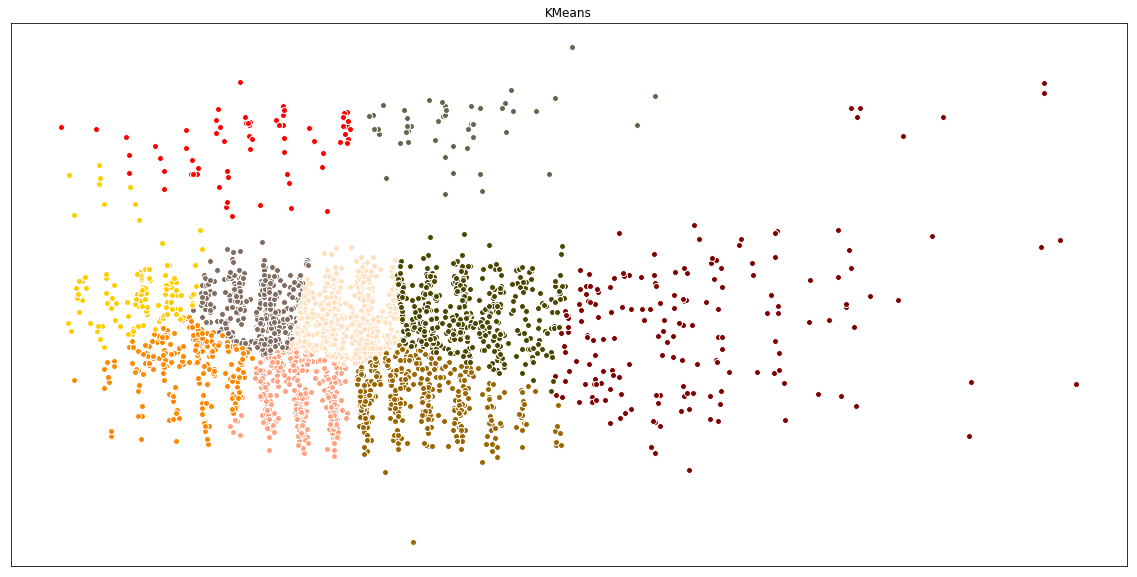

In [60]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('KMeans')

for k, col in zip(range(len(colors)), colors):
    my_members = k_means_labels == k
    ax.plot(beers_redu[my_members, 0], beers_redu[my_members, 1], 'w', markerfacecolor=col, marker='o')

ax.set_xticks(())
ax.set_yticks(())
plt.show()

Del gráfico anterior, si es comparado con la *clusterización* generada por K-Means. Se observa que si bien los clusters están ubicados en las mismas posiciones, los bordes de los mismos son más geometricos y menos definidos. Ésto se debe al tamaño elegido de la sub muestra que se analiza en cada iteración del algoritmo. 

Se asume que si se aumenta el valor de batch_size es posible llegar a clusters más parecidos al de K-Means tradicional, pero comprometiendo la ganancia en rapidez de este metodo. 

### HAC (Hierarchical agglomerative clustering)

El clustering aglomerativo jerárquico es una estrategia de clustering *bottom-up*, esto quiere decir que a partir de los datos se van generando distintos cluster anidados hasta obtener un único cluster. Para medir la distancia entre clusters se utilizan diferentes métodos. A continuación, se presentan los resultados sobre la muestra del dataset usando, *complete link* y *Ward link*. 

In [68]:
percentage = 0.1
seed = 10

datasetSample = dataset.sample(n = int(size*percentage/100), random_state = seed)
size, features = datasetSample.shape

print("El tamanno de la muestra es de {} registros lo que representa un {}% del total.".format(size, percentage))
print("Ademas luego de las eliminaciones consta de solo {} caracteristicas".format(features))

El tamanno de la muestra es de 1586 registros lo que representa un 0.1% del total.
Ademas luego de las eliminaciones consta de solo 6 caracteristicas


In [69]:
datasetSample = datasetSample.fillna(0)

In [70]:
beers = datasetSample.as_matrix()

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

beers_std = StandardScaler().fit_transform(beers)

sklearn_pca = PCA(n_components=2)
beers_redu = sklearn_pca.fit_transform(beers_std)

In [72]:
clusters = 10 #NUMERO DE CLUSTERS

#### Complete Link

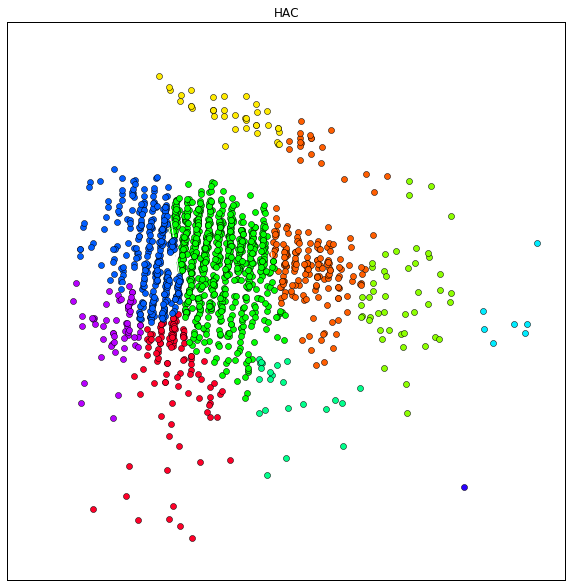

In [73]:
%matplotlib inline
import numpy as np
import sklearn
import scipy
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering as hac

clustering = hac(linkage="complete", n_clusters=clusters, affinity="euclidean")
clustering.fit(beers_redu)

fig = plt.figure(figsize=(10, 10))
cmap = plt.cm.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, clusters+1)]
ax = fig.add_subplot(1, 1, 1)
ax.set_title('HAC')

for k, col in zip(range(len(colors)), colors):
    my_members = clustering.labels_ == k
    ax.plot(beers_redu[my_members, 0], beers_redu[my_members, 1], 'w', markerfacecolor=col, marker='o')

ax.set_xticks(())
ax.set_yticks(())
plt.show()

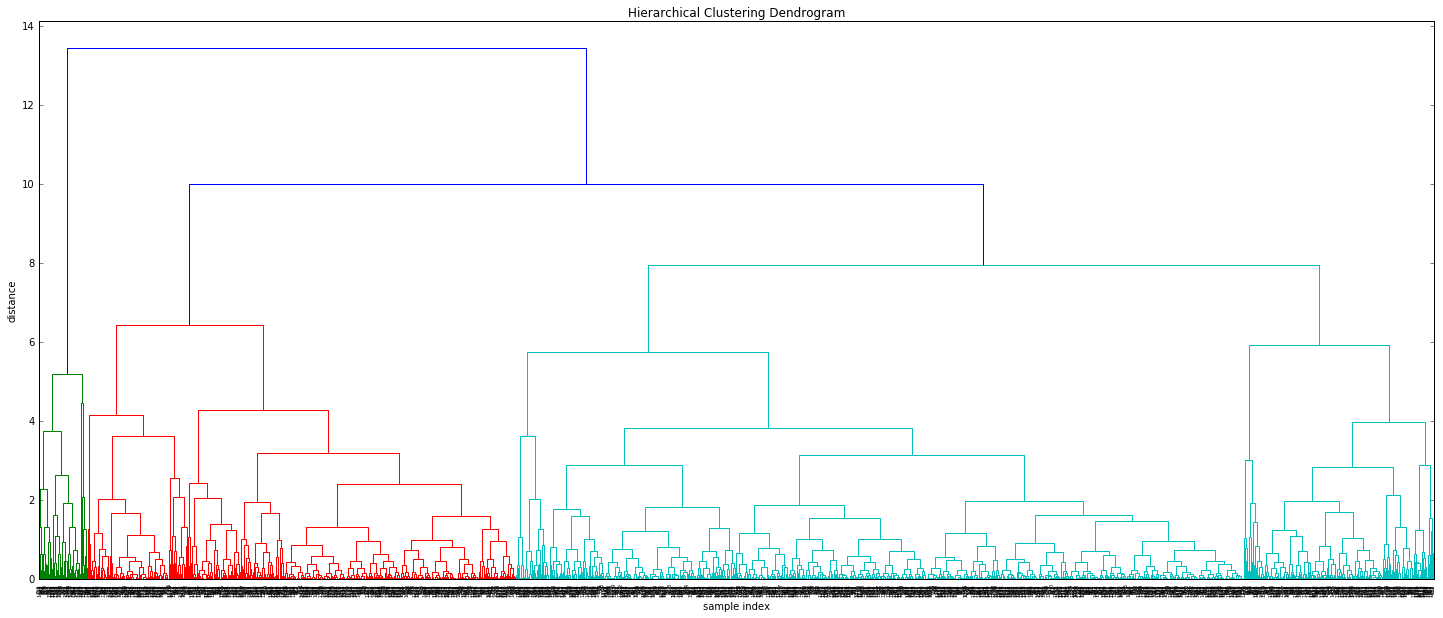

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(beers_redu, 'complete')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

#### Ward Link

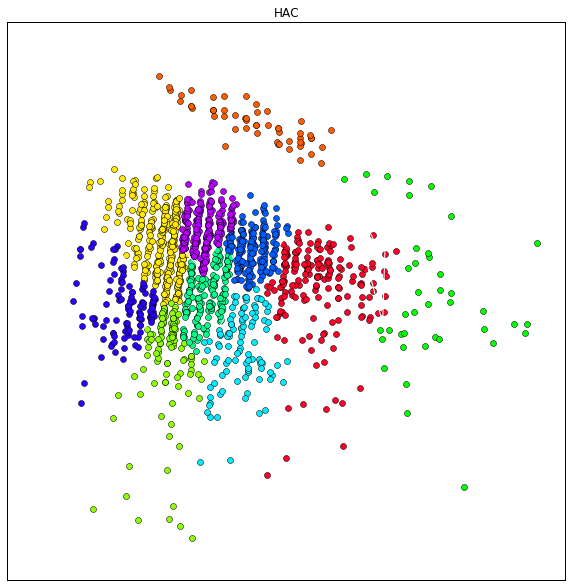

In [75]:
### WARD ###

clustering = hac(linkage="ward", n_clusters=clusters, affinity="euclidean")
clustering.fit(beers_redu)

fig = plt.figure(figsize=(10, 10))
cmap = plt.cm.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, clusters+1)]
ax = fig.add_subplot(1, 1, 1)
ax.set_title('HAC')

for k, col in zip(range(len(colors)), colors):
    my_members = clustering.labels_ == k
    ax.plot(beers_redu[my_members, 0], beers_redu[my_members, 1], 'w', markerfacecolor=col, marker='o')

ax.set_xticks(())
ax.set_yticks(())
plt.show()

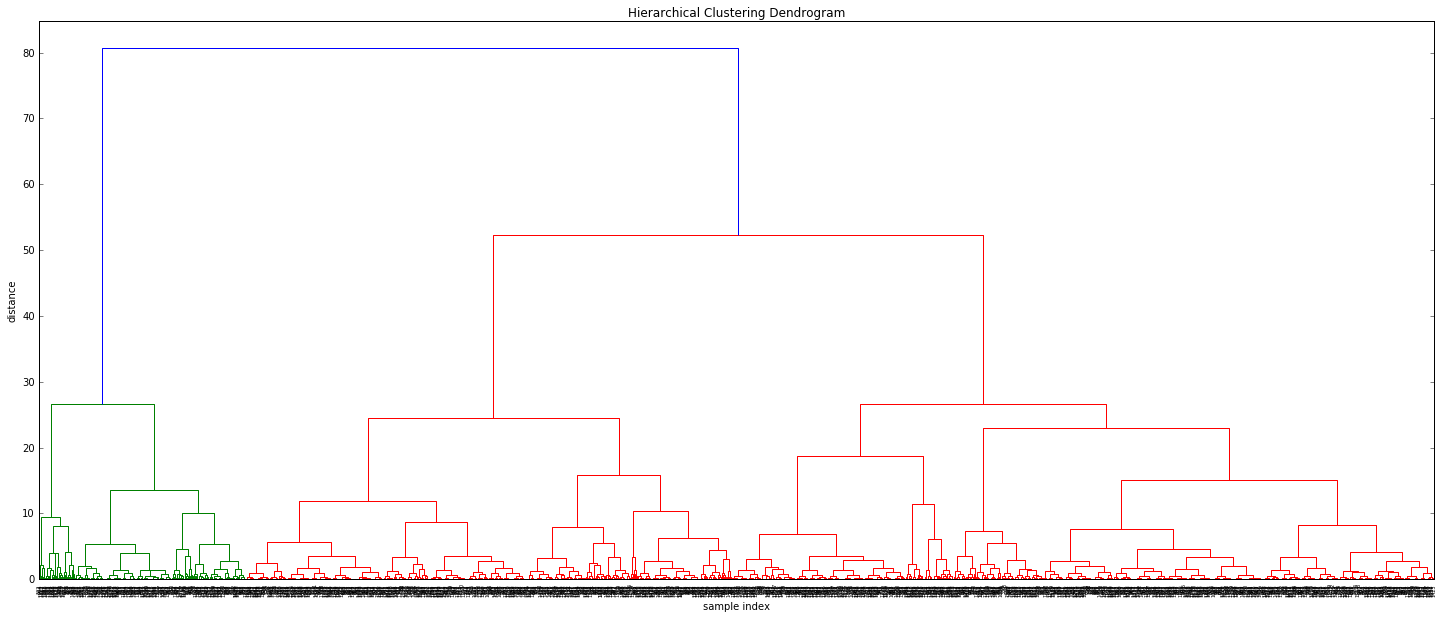

In [76]:
Z = linkage(beers_redu, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

### DBSCAN

numero de clusters: 3



C:\Users\david\Anaconda3\lib\site-packages\matplotlib\lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


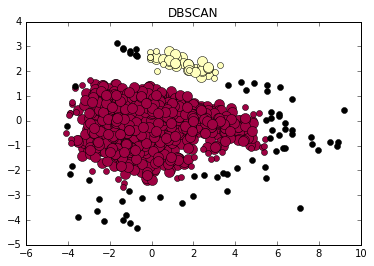

In [77]:
import numpy, scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

db = DBSCAN(eps=0.6, min_samples=10).fit(beers_redu)
labels = db.labels_
unique_labels = set(labels)
print("numero de clusters: {}\n".format(len(unique_labels)))


core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = beers_redu[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = beers_redu[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title("DBSCAN")
plt.show()